# EXEMPLE JOUET POUR DEMARRER

In [1]:
# Libraries utilisées
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import sympy as sp

## Générer un ensemble de données

Nous générons un ensemble de données formant un cercle de centre (xc = 0, yc = 0) et de rayon R = 2 que nous allons bruiter.

In [2]:
def generate_noisy_circle_data(num_points, R):
    angles = np.linspace(0, 2*np.pi, num_points)
    x = x_c + R * np.cos(angles) + np.random.normal(-noise_level, noise_level, num_points)
    y = y_c + R * np.sin(angles) + np.random.normal(-noise_level, noise_level, num_points)
    
    points = np.column_stack((x, y))
    return points

In [3]:
# Caractéristiques du cercle
R = 2
x_c = 0
y_c = 0

# Nombre de points à générer
N = 100

# Paramètre du bruit
noise_level = 0.1

# Générer les données bruitée du cercle
points = generate_noisy_circle_data(N, R)

<Figure size 600x600 with 0 Axes>

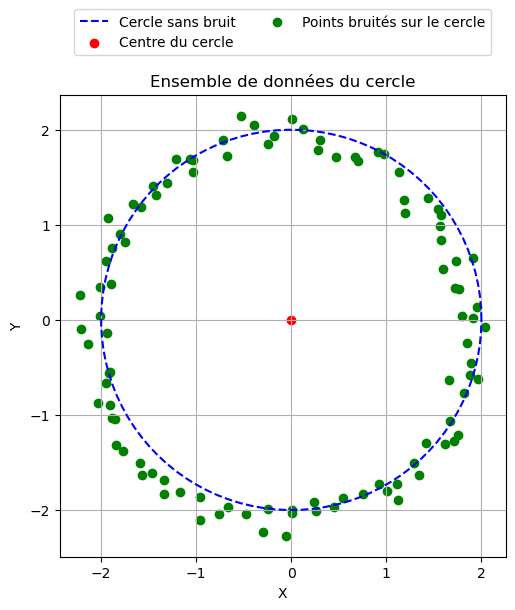

In [4]:
# Figure représentant les données buitées
plt.figure(figsize=(6,6))

# Affichage du cercle sans données bruitées
theta = np.linspace(0, 2*np.pi, 100)
x_circle = R * np.cos(theta)
y_circle = R * np.sin(theta)

plt.figure(figsize=(6,6))
plt.plot(x_circle, y_circle, label='Cercle sans bruit', color='blue',  linestyle='--',)

# Affichage du centre du cercle
center_x, center_y = 0, 0
plt.scatter(center_x, center_y, color='red', marker='o', label='Centre du cercle')

# Affichage du cercle avec données bruitées
plt.scatter(points[:, 0], points[:, 1], label='Points bruités sur le cercle', color='green')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Ensemble de données du cercle')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.grid(True)
plt.show()

## Méthode du gradient à pas fixe

In [5]:
def J(x, y, points):
    '''
    Renvoie la fonction coût J(x,y) à minimiser
    '''
    return np.sum(x - points[:, 0])**2 + (y - points[:, 1])**2

In [6]:
def grad_J(x, y, points):
    '''
    Renvoie le gradient sous forme de Numpy array
    '''
    gradx = 2 * np.sum(x - points[:, 0])
    grady = 2 * np.sum(y - points[:, 1])
    
    return np.array([gradx, grady])

In [7]:
def gradient_descent_method(points, x0, a, eps, nmax):
    '''
    METHODE DU GRADIENT A PAS FIXE
    
    Renvoie xn : le centre du cercle trouvé, 
            traj : le tableau de la trajectoire suivie pour trouver le centre
            converge : le booléen indiquant si la méthode converge
            
    '''
    xn = np.array(x0)
    dx = 1
    n = 0
    traj = [xn]

    while (dx > eps) and (n < nmax):
        grad = grad_J(xn[0], xn[1], points)
        xn1 = xn - a * grad
        dx = np.sqrt((xn1[0] - xn[0])**2 + (xn1[1] - xn[1])**2)
        xn = xn1
        n += 1
        traj.append(xn)

    converge = (dx <= eps)
    print("Converge = ", converge)
    
    return xn, traj, converge

In [8]:
# Application de la méthode du gradient
x0 = (4, 4) # initial point
a = 0.001 # pas de recherche
eps = 10**(-6) # precision
nmax = 1000 # nombre maximum d'itérations

gd_centre, gd_traj, gd_converge = gradient_descent_method(points, x0, a, eps, nmax)
print("Centre du cercle trouvé: ", gd_centre)

Converge =  True
Centre du cercle trouvé:  [-0.07872571 -0.10453356]


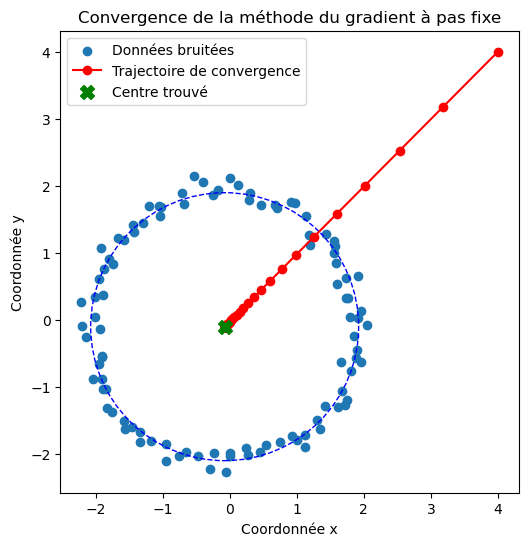

In [9]:
# Convertir traj en un array NumPy pour un traitement facile
traj_grad_pas_fixe = np.array(gd_traj)

# Affichage dde la recherche du centre du cercle par la méthode de descente du gradient
plt.figure(figsize=(6,6))

# Tracer les points de données
plt.scatter(points[:, 0], points[:, 1], label='Données bruitées', zorder = 1)

# Tracer la trajectoire de convergence
plt.plot(traj_grad_pas_fixe[:, 0], traj_grad_pas_fixe[:, 1], 'ro-', label='Trajectoire de convergence', zorder = 2)

# Marquer le centre final trouvé
plt.scatter(gd_centre[0], gd_centre[1], c='green', s=100, label='Centre trouvé', marker='X', zorder = 3)

plt.title('Convergence de la méthode du gradient à pas fixe')
plt.xlabel('Coordonnée x')
plt.ylabel('Coordonnée y')
plt.legend()

# Afficher le cercle réel
cercle = plt.Circle((gd_centre[0], gd_centre[1]), R, color='blue', fill=False, linestyle='--', label='Cercle estimé')
plt.gca().add_artist(cercle)

# Afficher le graphique
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Gradient stochastique

In [10]:
def stochastic_grad_J(point, x, y):
    '''
    Calcule et renvoie le gradient de J pour un seul point.
    '''
    gradx = 2 * (x - point[0])
    grady = 2 * (y - point[1])
    return np.array([gradx, grady])

In [11]:
def stochastic_grad_method(points, x0, learning_rate, nb_pts, n_iter, eps):
    '''
    METHODE DU GRADIENT STOCHASTIQUE
    
    Renvoie xn1 : le centre du cercle trouvé, 
            traj : le tableau de la trajectoire suivie pour trouver le centre
            converge : le booléen indiquant si la méthode converge
            
    '''
    xn = np.array(x0)
    dx = 1
    n = 0
    traj = [xn]
    
    while (dx > eps) and (n < nmax):
        
        # Sélection d'un point aléatoire de l'ensemble des points
        random_index = np.random.randint(0, nb_pts)
        point = points[random_index]
        
        # Calcul du gradient pour ce point
        grad = stochastic_grad_J(point, xn[0], xn[1])
        
        # Mise à jour les coordonnées du centre
        xn1 = xn - learning_rate * grad
        dx = np.sqrt((xn1[0] - xn[0])**2 + (xn1[1] - xn[1])**2)
        xn = xn1
        n += 1
        traj.append(xn)
        
    converge = (dx <= eps)
    print("Converge = ", converge)    
    return xn1, traj, converge

In [12]:
x0 = (4, 4) #initial point
a = 0.003 # facteur d'apprentissage => on remarque que pour des valeurs supérieures, la trajectoire forme une boule de point à proximité du centre réel, pour des valeurs inférieures, le gradient n'atteint pas le centre.
eps = 10**(-6) # precision
n_iter = 1000 # nombre maximum d'itérations

sgd_centre, sgd_traj, sgd_converge = stochastic_grad_method(points, x0, a, N, n_iter, eps)
print("centre du cercle : ", sgd_centre)

Converge =  False
centre du cercle :  [-0.18793048 -0.083444  ]


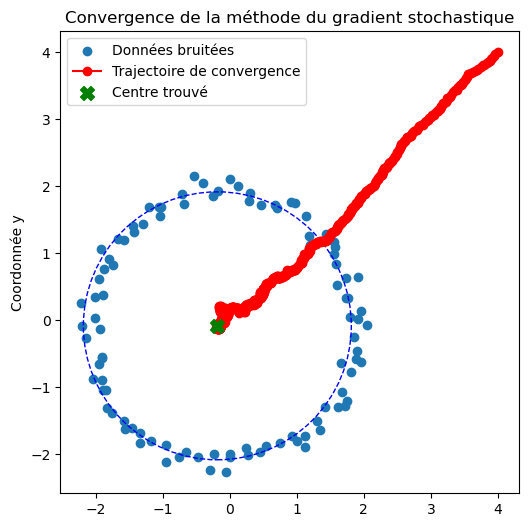

In [13]:
# Convertion de traj_stochastic en un array NumPy
traj_stochastic = np.array(sgd_traj)

# Affichage dde la recherche du centre du cercle par la méthode de descente du gradient
plt.figure(figsize=(6,6))

# Tracer les points de données
plt.scatter(points[:, 0], points[:, 1], label='Données bruitées', zorder = 1)

# Tracer la trajectoire de convergence
plt.plot(traj_stochastic[:, 0], traj_stochastic[:, 1], 'ro-', label='Trajectoire de convergence', zorder = 2)

# Marquer le centre final trouvé
plt.scatter(sgd_centre[0], sgd_centre[1], c='green', s=100, label='Centre trouvé', marker='X', zorder = 3)

plt.title('Convergence de la méthode du gradient stochastique')
plt.ylabel('Coordonnée y')
plt.legend()

# Afficher le cercle réel
cercle = plt.Circle((sgd_centre[0], sgd_centre[1]), R, color='blue', fill=False, linestyle='--', label='Cercle estimé')
plt.gca().add_artist(cercle)

# Afficher le graphique
plt.gca().set_aspect('equal', adjustable='box')  # pour que le cercle apparaisse comme un cercle
plt.show()

## Comparaison entre le gradient à pas fixe et le gradient stochastique



Le gradient stochastique peut converger plus rapidement car il ne prend en considération qu'un point à la fois. Le gradient à pas fixe a une convergence plus lente car nécessite à chaque fois le parcours de l'ensemble des données à chaque itération.

### Étude de la convergence

Converge =  True
Converge =  False


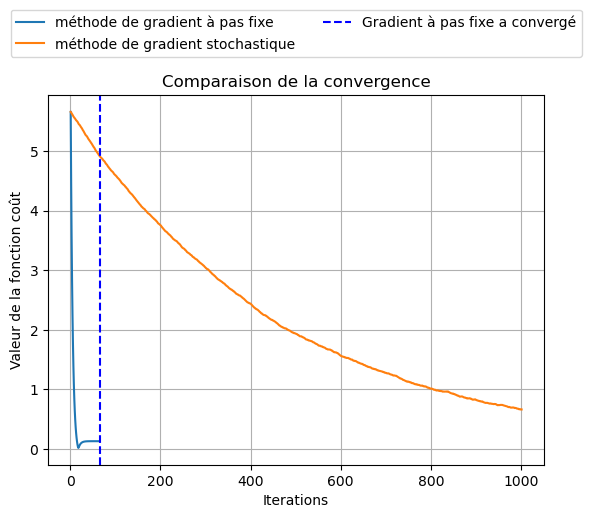

In [14]:
x0 = (4, 4)

# Gradient à pas fixe
a = 0.001
eps = 1e-6
n_iter = 1000

xn_fixe, traj_pas_fixe, gd_converge = gradient_descent_method(points, x0, a, eps, n_iter)

# Gradient stochastique
n_iter = 1000
a_SGD = 0.003  # Learning rate for stochastic gradient descent
xn_stochastic, traj_stochastic, sgd_converge = stochastic_grad_method(points, x0, a, N, n_iter, eps)

# Tracé de la méthode de gradient à pas fixe
traj_pas_fixe_norm = [np.linalg.norm(point) for point in traj_pas_fixe]
plt.plot(range(1, len(traj_pas_fixe_norm) + 1), traj_pas_fixe_norm, label='méthode de gradient à pas fixe')

# Tracé de la méthode de gradient stochastique
traj_stochastic_norm = [np.linalg.norm(point) for point in traj_stochastic]
plt.plot(range(1, len(traj_stochastic_norm) + 1), traj_stochastic_norm, label='méthode de gradient stochastique')

#Tracé de la convergence
if gd_converge:
    plt.axvline(len(traj_pas_fixe), color='blue', linestyle='--', label='Gradient à pas fixe a convergé')

plt.xlabel('Iterations')
plt.ylabel('Valeur de la fonction coût')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.title('Comparaison de la convergence')
plt.grid(True)
plt.show()

# Application a un problème de classification

Dans cette partie, nous nous intéressons à la classification logistique de données relatives au cancer du sein. L'objectif est de prédire, à partir des descripteurs, si la patiente est atteinte du cancer ou non. Pour cela, nous entraînons un modèle pour trouver le vecteur de poids w qui minimise la fonction de coût sur l'ensemble des données.

Nous appliquerons d'une part la méthode du gradient à pas fixe et de l'autre la méthode du gradient stochastique.

## Récupération des données

Nous récupérons les données et affichons les 5 premières lignes correspondant aux 5 premières patientes pour avoir une idées du type du données sur lequelles nous travaillons.

In [15]:
column_names = ['feature_' + str(i) for i in range(1, 31)] + ['target']
df = pd.read_csv('data_classification.csv', header = None, names=column_names)
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        0.0   0.310426   0.157254   0.301776   0.179343   0.407692   
1        0.0   0.288655   0.202908   0.289130   0.159703   0.495351   
2        0.0   0.119409   0.092323   0.114367   0.055313   0.449309   
3        0.0   0.286289   0.294555   0.268261   0.161315   0.335831   
4        0.0   0.057504   0.241123   0.054730   0.024772   0.301255   

   feature_7  feature_8  feature_9  feature_10  ...  feature_22  feature_23  \
0   0.189896   0.156139   0.237624    0.416667  ...    0.255425    0.192964   
1   0.330102   0.107029   0.154573    0.458081  ...    0.233725    0.225746   
2   0.139685   0.069260   0.103181    0.381313  ...    0.081821    0.097015   
3   0.056070   0.060028   0.145278    0.205556  ...    0.191035    0.287580   
4   0.122845   0.037207   0.029409    0.358081  ...    0.036784    0.264925   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0    0.245480    0.12

Nous pouvons également faire une brève étude statistique pour connaître la répartition des données pour chaque "feature".

In [16]:
# Summary statistics
print(df.describe())

        feature_1   feature_2   feature_3   feature_4   feature_5   feature_6  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.372583    0.338222    0.323965    0.332935    0.216920    0.394785   
std      0.483918    0.166787    0.145453    0.167915    0.149274    0.126967   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.223342    0.218465    0.216847    0.117413    0.304595   
50%      0.000000    0.302381    0.308759    0.293345    0.172895    0.390358   
75%      1.000000    0.416442    0.408860    0.416765    0.271135    0.475490   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        feature_7   feature_8   feature_9  feature_10  ...  feature_22  \
count  569.000000  569.000000  569.000000  569.000000  ...  569.000000   
mean     0.260601    0.208058    0.243137    0.379605  ...    0.296663   
std      0.161992    0.186785    0.192857    0.1

Nous vérifions également qu'il ne manque aucune valeur.

In [17]:
# Check for missing values
print(df.isnull().sum())

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
target        0
dtype: int64


## Séparation des données

Nous séparons les caractéristiques des patientes X et leur diagnostic y. Puis, nous divisons la base de données en 2 sous-ensembles : 80% pour entraîner le modèle et 20% pour tester le modèle.

In [18]:
# Séparation des caractérisques de la patiente et de son diagnostic
X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()

# Vérification de la taille
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [19]:
# Ajout de la composante constante x0 = 1
X = np.c_[np.ones(len(X)), X]

# Vérification de la taille
print(X.shape)

(569, 31)


In [20]:
# Séparation aléatoire des données en 2 sous-ensembles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification de la taille
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 31)
(114, 31)
(455,)
(114,)


In [21]:
n_features = 31 # Nombre de features

# Initialisation aléatoire des poids w
w_init = np.random.randn(n_features)

print(w_init.shape)
print("Initial weights:", w_init)

(31,)
Initial weights: [ 1.10195617  1.50423858  3.74677902  0.4059572  -1.96151532 -1.3332009
  0.32455318  1.69762133  0.16040435 -0.09896485  0.09924834 -1.51107805
 -0.57616371  1.00128429  2.18613221  1.05165962 -0.75119124  0.42125134
  0.86819025 -0.62735414 -1.75794797 -1.19576089 -0.00794674  0.80006865
 -0.22831719 -1.93027312  0.05806246  1.05267183 -0.49221729 -1.00642088
 -0.22317177]


## Gradient à pas fixe

In [22]:
def sigmoid(x):
    '''
    Calcule la fonction sigmoid
    '''
    return 1 / (1 + np.exp(-x))

In [23]:
def J(X, y, w):
    '''
    Calcule la fonction coût
    '''
    N = len(y)
    z = np.dot(X, w)
    Pi = sigmoid(z)
    cost = (-1/N) * np.sum(y * np.log(Pi) + (1-y) * np.log(1 - Pi))
    return cost

In [24]:
def gradient_J(X, y, w):
    '''
    Calcule et renvoie le gradient
    '''
    N = len(y)
    z = np.dot(X, w)
    Pi = sigmoid(z)
    grad = (-1/N) * np.dot(X.T, (y - Pi)) #(-1/N) * X.T @ (y - Pi)                 
    return grad

In [38]:
def gradient_pas_fixe(X, y, a, n_iter, w_init, eps, beta, use_momentum):
    '''
    METHODE DU GRADIENT A PAS FIXE
    
    Renvoie w : le poids minimisant la fonction coût
            cost_history : le tableau du coût par itération
            
    '''
    w = w_init
    momentum = np.zeros(w.shape)
    costs_history = []
    
    for i in range(n_iter):
        grad = gradient_J(X, y, w)

        if np.linalg.norm(grad) < eps:
            break
            
        if use_momentum:
            velocity = beta * momentum + grad
            w = w - a * velocity
            momentum = velocity
        else:
            w = w - a * grad
            
        cost = J(X, y, w)
        costs_history.append(cost)

        # if i % 100 == 0: # print chaque 100 iter
            # print(f"Iteration {i}, Cost: {cost}")
            
    print("Nb of iterations to converge : ", len(costs_history))
    
    return w, costs_history

In [39]:
a = 0.3 #learning rate
n_iter = 1000
eps = 10**(-3)
beta = 0.9

# Sans la méthode du momentum
use_momentum = False
w_final_no_momentum, costs_no_momentum, = gradient_pas_fixe(X_train, y_train, a, n_iter, w_init, eps, beta, use_momentum)

# Avec la méthode du momentum
use_momentum = True
w_final_momentum, costs_momentum, = gradient_pas_fixe(X_train, y_train, a, n_iter, w_init, eps, beta, use_momentum)

Nb of iterations to converge :  1000
Nb of iterations to converge :  1000


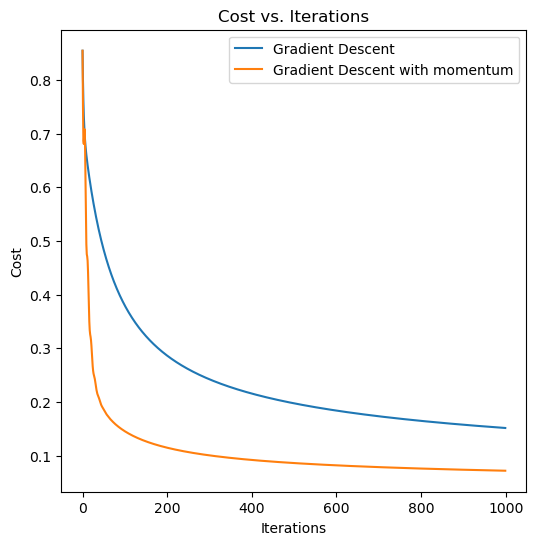

Cost average of one iteration without momentum: 0.23847396951952135
Cost average of one iteration with momentum: 0.1062935974592967


In [40]:
# Affichage du coût de calcul
plt.figure(figsize=(6,6))
plt.plot(costs_no_momentum, label='Gradient Descent')
plt.plot(costs_momentum, label='Gradient Descent with momentum')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.legend()
plt.show()

print(f"Cost average of one iteration without momentum: {np.mean(costs_no_momentum)}")
print(f"Cost average of one iteration with momentum: {np.mean(costs_momentum)}")

## Évaluation de la prédiction

In [41]:
# Prediction function using the sigmoid
def predict(X, w):
    ''' Calcule la fonction sigmoid et donne la prédication
        
        Renvoie la classe prédite
    '''
    # Calcul de la probabilité
    probabilities = sigmoid(np.dot(X, w))
    
    # Conversion de la probabilité en prédiction
    return (probabilities >= 0.5).astype(int)

def evaluate_accuracy(y_true, y_pred):
    ''' Evalue la précision du modèle sur la base des prédiction correcte
        
        Renvoie la précision du modèle
    '''
    # Calcul du nb de prédictions correctes
    correct_predictions = np.sum(y_true == y_pred)
    
    # Calcul de la précision
    accuracy = correct_predictions / len(y_true)
    return accuracy

In [42]:
# Prediction du diagnosti sur les sous-ensembles d'entraînement et de test
y_train_pred_no_momentum = predict(X_train, w_final_no_momentum)
y_test_pred_no_momentum = predict(X_test, w_final_no_momentum)

y_train_pred_momentum = predict(X_train, w_final_momentum)
y_test_pred_momentum = predict(X_test, w_final_momentum)

# Calcul de la précision
train_accuracy_no_momentum = evaluate_accuracy(y_train, y_train_pred_no_momentum)
test_accuracy_no_momentum = evaluate_accuracy(y_test, y_test_pred_no_momentum)

train_accuracy_momentum = evaluate_accuracy(y_train, y_train_pred_momentum)
test_accuracy_momentum = evaluate_accuracy(y_test, y_test_pred_momentum)

print(f"Training Accuracy without momentum: {train_accuracy_no_momentum}")
print(f"Test Accuracy without momentum: {test_accuracy_no_momentum}")

print(f"Training Accuracy with momentum: {train_accuracy_momentum}")
print(f"Test Accuracy with momentum: {test_accuracy_momentum}")

Training Accuracy without momentum: 0.9582417582417583
Test Accuracy without momentum: 0.9473684210526315
Training Accuracy with momentum: 0.9824175824175824
Test Accuracy with momentum: 0.9649122807017544


## Gradient Stochastique

In [44]:
def stochastic_gradient_descent(X, y, w_init, alpha, n_iter, precision):
    '''
    METHODE DU GRADIENT STOCHASTIQUE
    
    Renvoie w : le poids minimisant la fonction coût
            cost_history : le tableau du coût par itération
            
    '''
    w = w_init
    costs_history = []

    for i in range(n_iter):
        indices = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(len(y)):
            x_j = X_shuffled[j:j+1]
            y_j = y_shuffled[j:j+1]

            grad = gradient_J(x_j, y_j, w)

        
        if np.linalg.norm(grad) < precision:
            break
            
        # Mise à jour des w
        w = w - alpha * grad
        
        cost = J(X, y, w)
        costs_history.append(cost)
        
        # if i % 100 == 0: # print chaque 100 iter
            # print(f"Iteration {i}, Cost: {cost}")
    
    print("Nb of iterations to converge : ", len(costs_history))
    
    return w, costs_history

In [45]:
# Application de la méthode du gradient stochastique
w_final_stochastic, costs_stochastic = stochastic_gradient_descent(X_train, y_train, w_init, a, n_iter, eps)

# Prediction du diagnostic sur les sous-ensembles d'entraînement et de test
y_train_pred = predict(X_train, w_final_stochastic)
y_test_pred = predict(X_test, w_final_stochastic)

# Calcul de la précision
train_accuracy_stochastic = evaluate_accuracy(y_train, y_train_pred)
test_accuracy_stochastic = evaluate_accuracy(y_test, y_test_pred)

print(f"Training Accuracy stochastic: {train_accuracy_stochastic}")
print(f"Test Accuracy stochastic: {test_accuracy_stochastic}")

Nb of iterations to converge :  466
Training Accuracy stochastic: 0.9318681318681319
Test Accuracy stochastic: 0.9298245614035088


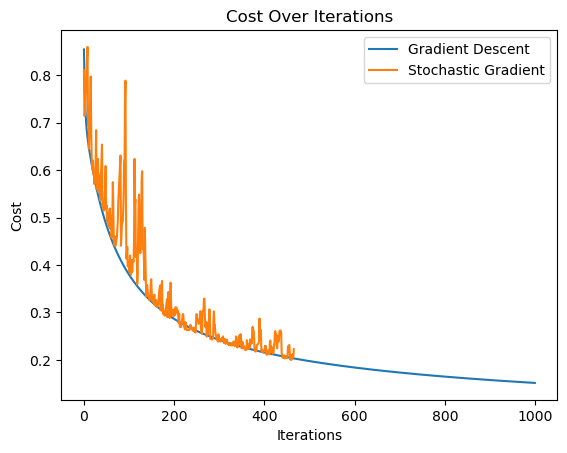

Cost average of one iteration for SGD: 0.3429332409097136


In [46]:
plt.plot(costs_no_momentum, label='Gradient Descent')
#plt.plot(costs_momentum, label='Gradient Descent with momentum')
plt.plot(costs_stochastic, label='Stochastic Gradient')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Over Iterations')
plt.legend()
plt.show()

print(f"Cost average of one iteration for SGD: {np.mean(costs_stochastic)}")